In [1]:
import torch
from rnn_model import EncoderRNN, AttnDecoderRNN
from rnn_model_train import trainIters

import data_preparation as dp
import filepaths as fp
from rnn_model_predict import predict
from plots import showPlot, showAttention

In [2]:
(slang, tlang, index_array_pairs) = dp.prepare_training_data(
    fp.spath_toy, fp.tpath_toy, False)

max_length = 0
for pair in index_array_pairs:
    max_length = max(len(pair[0]), len(pair[1]), max_length)

In [3]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
hidden_size = 256 #256

encoder1 = EncoderRNN(slang.n_words, hidden_size).to(device)
attn_decoder1 = AttnDecoderRNN(hidden_size, tlang.n_words, max_length, dropout_p=0.1).to(device)


In [4]:
plot_losses = trainIters(
    index_array_pairs, encoder1, attn_decoder1,  
    1500, max_length, print_every=150, plot_every=15 )

0m 6s (- 0m 59s) (150 10%) 3.4232
0m 12s (- 0m 48s) (300 20%) 3.1834
0m 17s (- 0m 41s) (450 30%) 2.7541
0m 23s (- 0m 35s) (600 40%) 2.7711
0m 29s (- 0m 29s) (750 50%) 2.2628
0m 36s (- 0m 24s) (900 60%) 1.4801
0m 42s (- 0m 18s) (1050 70%) 0.8756
0m 49s (- 0m 12s) (1200 80%) 0.2225
0m 56s (- 0m 6s) (1350 90%) 0.0914
1m 3s (- 0m 0s) (1500 100%) 0.0611


In [ ]:
for pair in index_array_pairs:
    s_indices = pair[0]
#     print(s_tensor)
    t_indices, a = predict(encoder1, attn_decoder1, s_indices, max_length)
    print(dp.sentenceFromIndexes(tlang, t_indices))
        

In [ ]:
showPlot(plot_losses)


In [ ]:
# TODO: plot loss, fix x-axis labels (100 => 100*plot_iter)
# TODO: detokenizing and true-casing
# TODO: move max_length to data_preparation

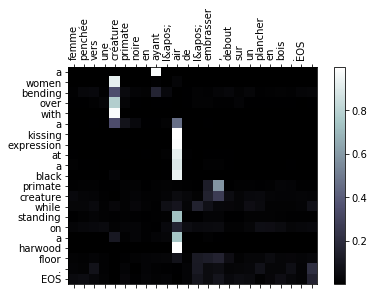

In [14]:
import random

pair = random.choice(index_array_pairs)
s_indices = pair[0]
t_indices, attentions = predict(encoder1, attn_decoder1, s_indices, max_length)

#s_sentence = dp.sentenceFromIndexes(slang, s_indices)
s_words = dp.wordsFromIndexes(slang, s_indices)
t_words = dp.wordsFromIndexes(tlang, t_indices)
showAttention(s_words, t_words, attentions)

In [ ]:
[''] + input_sentence.split(' ') +
                       ['<EOS>']in